## TC 5033
### Word Embeddings

### Team members:

+ Emmanuel Francisco González Velázquez - A01364577
+ Oscar Israel Lerma Franco - A01380817
+ Jesús Mario Martínez Díaz - A01740049
+ Eduardo Selim Martínez Mayorga - A01795167
+ José Antonio Hernández Hernández - A01381334

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)

#### Import libraries

In [4]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [7]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
#from google.colab import drive
#drive.mount('/content/drive')
DATA_PATH = '/home/olerma/Desktop/maestria/Advanced Machine Learning Methods/Tarea3/glove.6B/glove.6B.50d.txt'
#PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.50d.txt'
emb_dim = 50

In [9]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    embeddings_dict = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings_dict[word] = vector
    return embeddings_dict

In [11]:
# create dictionary
embeddings_dict = create_emb_dictionary(DATA_PATH)

In [13]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [16]:
# Show first n words with embeddings
def show_n_first_words(path, n_words):
    with open(path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            print(f"Word: {word}\nEmbedding: {vector}\nLength: {len(vector)}\n")
            if i >= n_words - 1:
                break

# Adjust 'PATH' to match your GloVe file path if needed
show_n_first_words(DATA_PATH, 5)

Word: the
Embedding: [ 4.1800e-01  2.4968e-01 -4.1242e-01  1.2170e-01  3.4527e-01 -4.4457e-02
 -4.9688e-01 -1.7862e-01 -6.6023e-04 -6.5660e-01  2.7843e-01 -1.4767e-01
 -5.5677e-01  1.4658e-01 -9.5095e-03  1.1658e-02  1.0204e-01 -1.2792e-01
 -8.4430e-01 -1.2181e-01 -1.6801e-02 -3.3279e-01 -1.5520e-01 -2.3131e-01
 -1.9181e-01 -1.8823e+00 -7.6746e-01  9.9051e-02 -4.2125e-01 -1.9526e-01
  4.0071e+00 -1.8594e-01 -5.2287e-01 -3.1681e-01  5.9213e-04  7.4449e-03
  1.7778e-01 -1.5897e-01  1.2041e-02 -5.4223e-02 -2.9871e-01 -1.5749e-01
 -3.4758e-01 -4.5637e-02 -4.4251e-01  1.8785e-01  2.7849e-03 -1.8411e-01
 -1.1514e-01 -7.8581e-01]
Length: 50

Word: ,
Embedding: [ 0.013441  0.23682  -0.16899   0.40951   0.63812   0.47709  -0.42852
 -0.55641  -0.364    -0.23938   0.13001  -0.063734 -0.39575  -0.48162
  0.23291   0.090201 -0.13324   0.078639 -0.41634  -0.15428   0.10068
  0.48891   0.31226  -0.1252   -0.037512 -1.5179    0.12612  -0.02442
 -0.042961 -0.28351   3.5416   -0.11956  -0.014533 -0.1499

In [18]:
show_n_first_words(DATA_PATH, 5)

Word: the
Embedding: [ 4.1800e-01  2.4968e-01 -4.1242e-01  1.2170e-01  3.4527e-01 -4.4457e-02
 -4.9688e-01 -1.7862e-01 -6.6023e-04 -6.5660e-01  2.7843e-01 -1.4767e-01
 -5.5677e-01  1.4658e-01 -9.5095e-03  1.1658e-02  1.0204e-01 -1.2792e-01
 -8.4430e-01 -1.2181e-01 -1.6801e-02 -3.3279e-01 -1.5520e-01 -2.3131e-01
 -1.9181e-01 -1.8823e+00 -7.6746e-01  9.9051e-02 -4.2125e-01 -1.9526e-01
  4.0071e+00 -1.8594e-01 -5.2287e-01 -3.1681e-01  5.9213e-04  7.4449e-03
  1.7778e-01 -1.5897e-01  1.2041e-02 -5.4223e-02 -2.9871e-01 -1.5749e-01
 -3.4758e-01 -4.5637e-02 -4.4251e-01  1.8785e-01  2.7849e-03 -1.8411e-01
 -1.1514e-01 -7.8581e-01]
Length: 50

Word: ,
Embedding: [ 0.013441  0.23682  -0.16899   0.40951   0.63812   0.47709  -0.42852
 -0.55641  -0.364    -0.23938   0.13001  -0.063734 -0.39575  -0.48162
  0.23291   0.090201 -0.13324   0.078639 -0.41634  -0.15428   0.10068
  0.48891   0.31226  -0.1252   -0.037512 -1.5179    0.12612  -0.02442
 -0.042961 -0.28351   3.5416   -0.11956  -0.014533 -0.1499

### Plot some embeddings

In [21]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Function to plot embeddings
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict=None, func=PCA):
    # Load embeddings if embeddings_dict is not provided
    if embeddings_dict is None:
        embeddings_dict = {}
        with open(emb_path, 'r', encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                vector = np.array(values[1:], dtype='float32')
                embeddings_dict[word] = vector

    # Filter embeddings for the specified words
    selected_embeddings = np.array([embeddings_dict[word] for word in words2show if word in embeddings_dict])
    words_found = [word for word in words2show if word in embeddings_dict]  # Filter words actually in the dict

    # Apply dimensionality reduction (PCA or t-SNE)
    reducer = func(n_components=2)
    reduced_embeddings = reducer.fit_transform(selected_embeddings)

    # Plotting
    plt.figure(figsize=(12, 10))
    for i, word in enumerate(words_found):
        x, y = reduced_embeddings[i]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), textcoords="offset points", xytext=(5, 2), ha='center')

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title(f'{func.__name__} Plot for Selected Word Embeddings')
    plt.show()

In [23]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


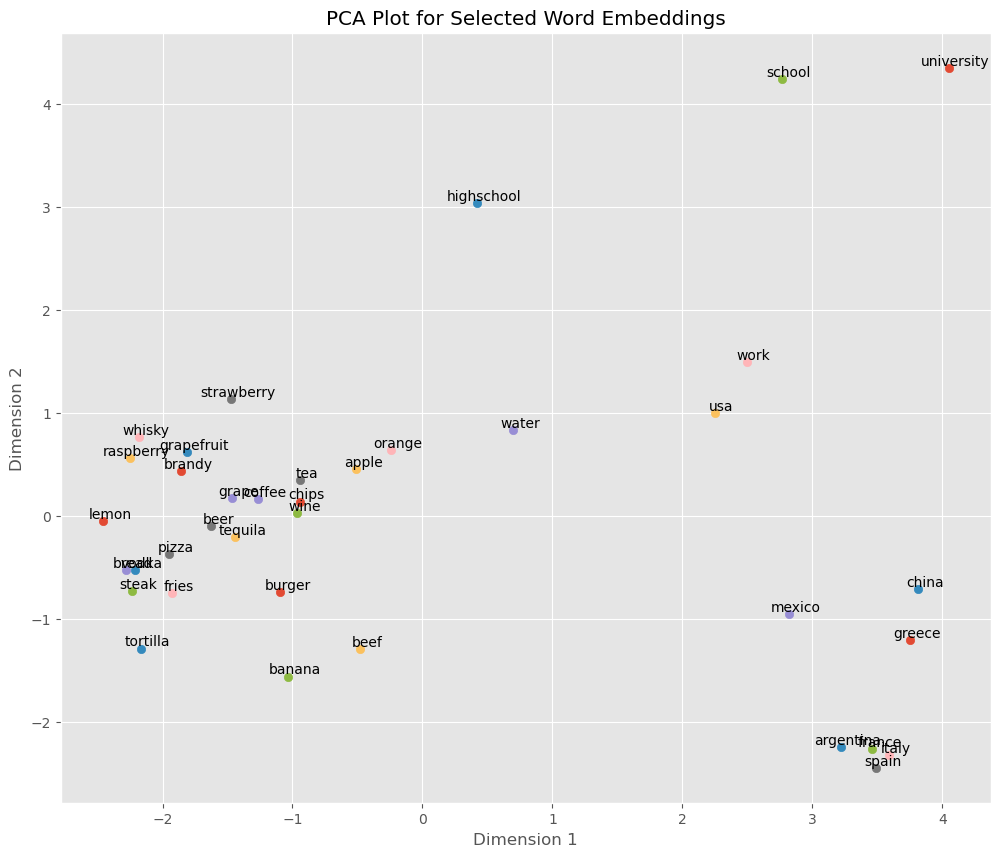

In [25]:
#
plot_embeddings(DATA_PATH, words, emb_dim, embeddings_dict, PCA)

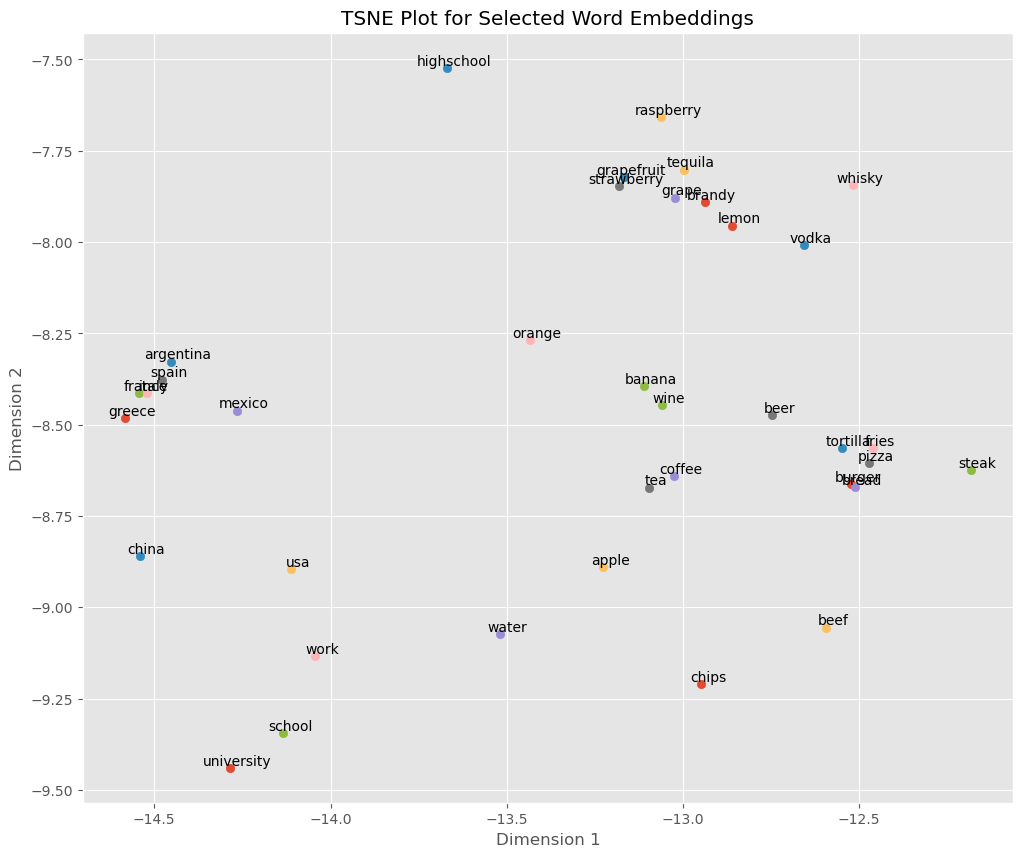

In [27]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(DATA_PATH, words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies

In [30]:
import numpy as np

# Analogy function
def analogy(word1, word2, word3, embeddings_dict):
    # Ensure all words are in the dictionary
    if word1 not in embeddings_dict or word2 not in embeddings_dict or word3 not in embeddings_dict:
        print(f"One of the words {word1}, {word2}, or {word3} is not in the dictionary.")
        return None

    # Compute the result vector
    result_vector = embeddings_dict[word2] - embeddings_dict[word1] + embeddings_dict[word3]

    # Find the word closest to the result vector
    best_match = None
    best_similarity = -np.inf  # Initialize with a low similarity value

    for word, vector in embeddings_dict.items():
        # Skip the original words
        if word in [word1, word2, word3]:
            continue

        # Calculate cosine similarity
        similarity = np.dot(result_vector, vector) / (np.linalg.norm(result_vector) * np.linalg.norm(vector))

        # Update best match if this word is closer
        if similarity > best_similarity:
            best_similarity = similarity
            best_match = word

    return best_match

In [32]:
analogy('man', 'king', 'woman', embeddings_dict)

'queen'

In [33]:
import numpy as np

# Function to find the most similar words
def find_most_similar(word, embeddings_dict, top_n=10):
    # Ensure the word exists in the dictionary
    if word not in embeddings_dict:
        print(f"The word '{word}' is not in the embeddings dictionary.")
        return []

    # Get the embedding for the specified word
    word_vector = embeddings_dict[word]

    # Compute cosine similarity with all other words
    similarities = {}
    for other_word, other_vector in embeddings_dict.items():
        if other_word == word:
            continue  # Skip the input word itself

        # Calculate cosine similarity
        similarity = np.dot(word_vector, other_vector) / (np.linalg.norm(word_vector) * np.linalg.norm(other_vector))
        similarities[other_word] = similarity

    # Sort words by similarity in descending order and get the top_n words
    most_similar_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return most_similar_words

In [36]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [37]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama
